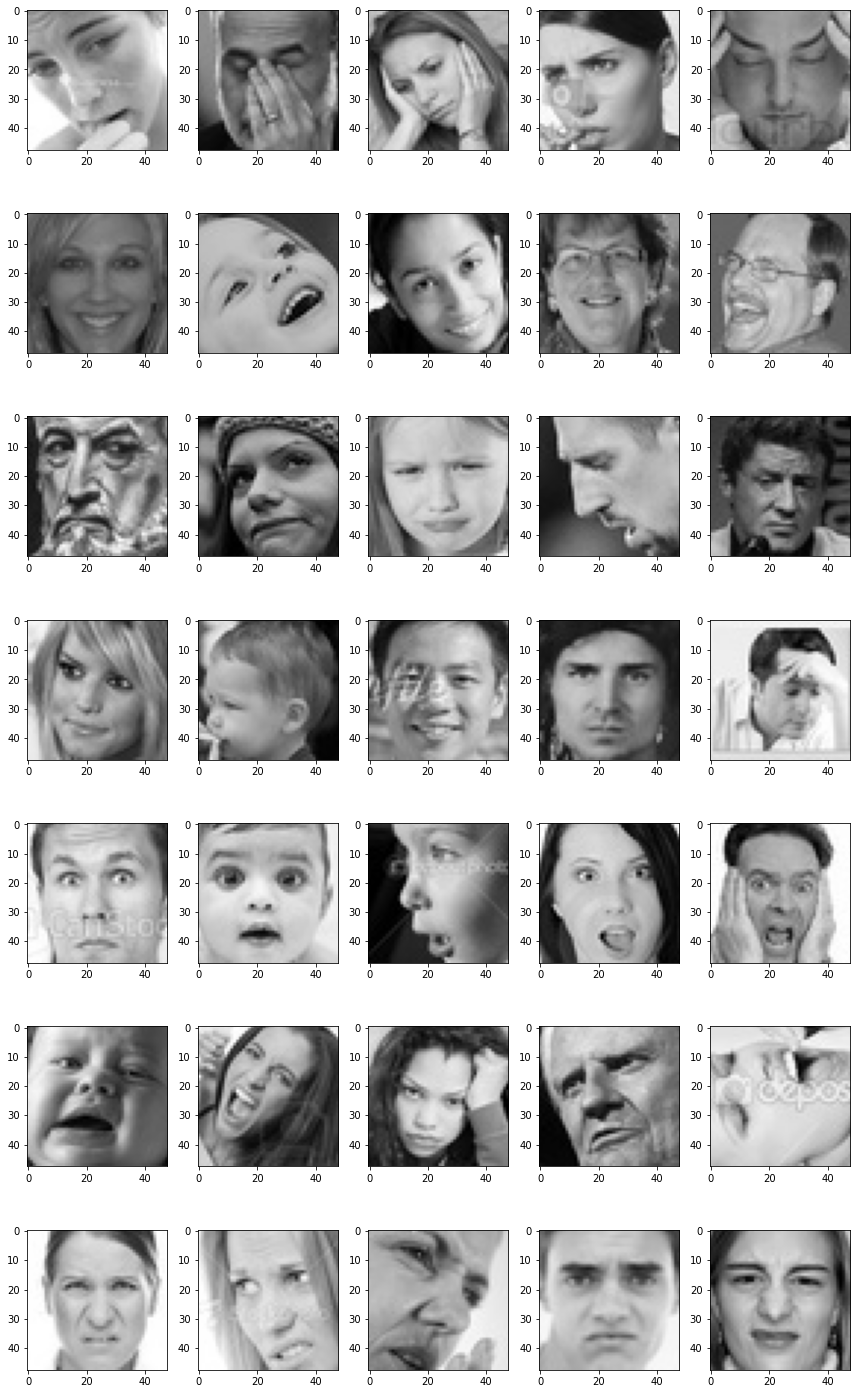

In [1]:
# display some images for every different expression

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "../input/face-expression-recognition-dataset/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

## Image augmentation using keras ImageDataGenerator

In [2]:
# building data generator 

from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
base_path = "../input/face-expression-recognition-dataset/images/"


train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(base_path + "train",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(base_path + "validation",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Defining our 4 Convolution and 2 Dense layers model

In [3]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 56, 56, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       5

In [4]:
%%time

# number of epochs to train the NN
epochs = 50

# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50
225/225 [==============================] - ETA: 0s - loss: 2.0383 - accuracy: 0.2179
Epoch 00001: val_accuracy improved from -inf to 0.17273, saving model to model_weights.h5
225/225 [==============================] - 96s 426ms/step - loss: 2.0383 - accuracy: 0.2179 - val_loss: 1.8595 - val_accuracy: 0.1727
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 1.9034 - accuracy: 0.2432
Epoch 00002: val_accuracy improved from 0.17273 to 0.18580, saving model to model_weights.h5
225/225 [==============================] - 41s 184ms/step - loss: 1.9034 - accuracy: 0.2432 - val_loss: 1.8809 - val_accuracy: 0.1858
Epoch 3/50
225/225 [==============================] - ETA: 0s - loss: 1.8596 - accuracy: 0.2599
Epoch 00003: val_accuracy improved from 0.18580 to 0.28821, saving model to model_weights.h5
225/225 [==============================] - 43s 191ms/step - loss: 1.8596 - accuracy: 0.2599 - val_loss: 1.7705 - val_accuracy: 0.2882
Epoch 4/50
225/225 [==============

225/225 [==============================] - ETA: 0s - loss: 1.2305 - accuracy: 0.5274
Epoch 00027: val_accuracy improved from 0.56648 to 0.57301, saving model to model_weights.h5
225/225 [==============================] - 43s 189ms/step - loss: 1.2305 - accuracy: 0.5274 - val_loss: 1.1248 - val_accuracy: 0.5730
Epoch 28/50
225/225 [==============================] - ETA: 0s - loss: 1.2169 - accuracy: 0.5331
Epoch 00028: val_accuracy did not improve from 0.57301
225/225 [==============================] - 43s 192ms/step - loss: 1.2169 - accuracy: 0.5331 - val_loss: 1.1566 - val_accuracy: 0.5615
Epoch 29/50
225/225 [==============================] - ETA: 0s - loss: 1.2092 - accuracy: 0.5357
Epoch 00029: val_accuracy improved from 0.57301 to 0.58565, saving model to model_weights.h5
225/225 [==============================] - 43s 191ms/step - loss: 1.2092 - accuracy: 0.5357 - val_loss: 1.1030 - val_accuracy: 0.5857
Epoch 30/50
225/225 [==============================] - ETA: 0s - loss: 1.2066 

In [5]:
# visualise training and testing accuracy and loss

def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    


    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()
 
# print best epoch with best accuracy on validation

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

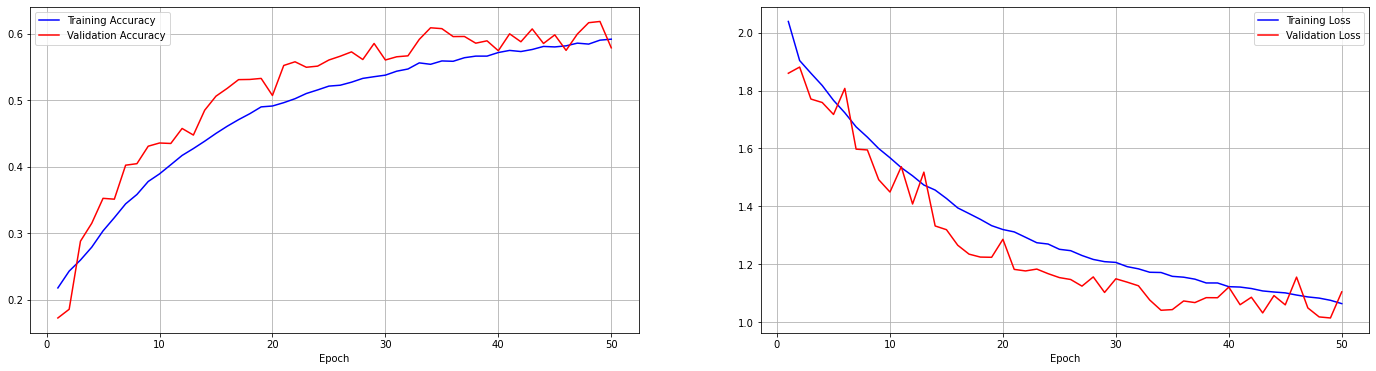

Best Validation Accuracy Score 0.61875, is for epoch 49


In [6]:
plot_results(history)
best_epoch =get_best_epcoh(history)